In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [6]:
data_reg = pd.read_excel('C:/Users/User/Downloads/ПЗ.Метрики.xlsx', sheet_name='Regression')
df_reg = data_reg.copy()
data_class = pd.read_excel('C:/Users/User/Downloads/ПЗ.Метрики.xlsx', sheet_name='Classification')
df_class = data_class.copy()
df_reg
#Загрузил все датафрейм и прсомотрел датафрейм с регрессией

,model,part,Y_true,Y_pred
0,LinReg,train,606,608
1,LinReg,train,1984,1965
2,Polynominal Reg,train,403,410
3,LinReg,train,1375,1398
4,Polynominal Reg,test,1084,1115
...,...,...,...,...
5195,Polynominal Reg,test,1551,1577
5196,LinReg,train,554,563
5197,Polynominal Reg,train,574,612
5198,Polynominal Reg,test,1907,1923


In [7]:
df_class
#Просмотрел датафрейм с классификацией

,model,part,Y_true,Y_pred_proba_1,Y_pred_proba_0,Y_pred
0,DecisionTree,test,1,0.53,0.47,1
1,DecisionTree,train,1,0.77,0.23,1
2,DecisionTree,test,1,0.31,0.69,0
3,DecisionTree,test,0,0.52,0.48,1
4,GradientBoosting,train,0,0.99,0.01,1
...,...,...,...,...,...,...
5195,GradientBoosting,test,1,0.28,0.72,0
5196,DecisionTree,test,1,0.98,0.02,1
5197,DecisionTree,train,1,0.31,0.69,0
5198,DecisionTree,test,0,0.08,0.92,0


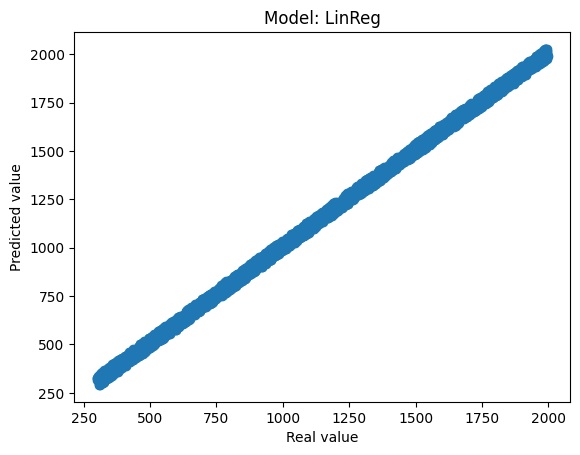

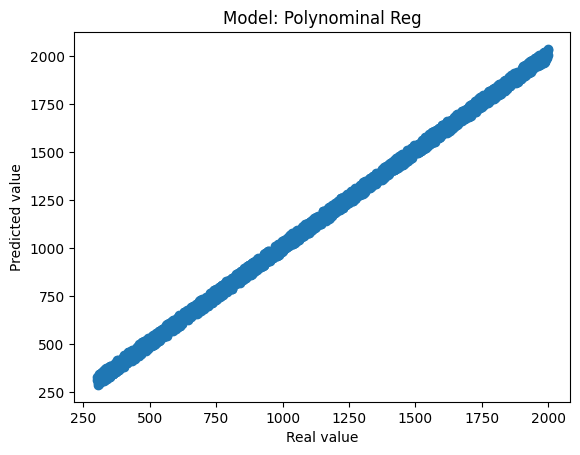

In [11]:
for model, sample in df_reg.groupby('model'):
    plt.scatter(sample['Y_true'], sample['Y_pred'])
    plt.title(f"Model: {model}")
    plt.xlabel('Real value')
    plt.ylabel('Predicted value')
    plt.show()
    #построил два графика для оценки точности предсказанных значений от правдивых, линия под 45 градусов почти идеальна, значит точность очень близка к 1

In [18]:
for model, sample in df_reg.groupby(['model']):
    y_true = sample['Y_true']
    y_pred = sample['Y_pred']

    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true,y_pred)
    print(model)
    print('mae - ' ,mae)
    print('mse - ' ,mse)
    print('rmse - ' ,rmse)
    print('r2 - ' ,r2)
    print()
#Посмотрел оценки и понял, что на моих данных лучше работает линейная регрессия, так как все оценки у нее лучше чем у полиноминалольной.

LinReg
mae -  16.42846357115893
mse -  392.439033597584
rmse -  19.810074043213064
r2 -  0.9983642327704761

Polynominal Reg
mae -  16.972167777342218
mse -  411.3869070952568
rmse -  20.28267504781499
r2 -  0.9983060358551937



C:\Users\User\AppData\Local\Temp\ipykernel_19984\354704714.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for model, sample in df_reg.groupby(['model']):


In [23]:
results = []

# Получил уникальные имена моделей и выборок
unique_models = df_class['model'].unique()
unique_parts = df_class['part'].unique()

# ВЫчислил метрики
for model in unique_models:
    for part in unique_parts:
        subset = df_class[(df_class['model'] == model) & (df_class['part'] == part)]
        y_true = subset['Y_true']
        y_pred = subset['Y_pred']
        
        confusion = confusion_matrix(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({'model': model, 'part': part, 'confusion': confusion, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

# ВывеЛ результаты
for result in results:
    print(f"Model: {result['model']}, Part: {result['part']}")
    print("Confusion Matrix:")
    print(result['confusion'])
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Precision: {result['precision']:.2f}")
    print(f"Recall: {result['recall']:.2f}")
    print(f"F1: {result['f1']:.2f}")
    print()

Model: DecisionTree, Part: test
Confusion Matrix:
[[330 314]
 [341 316]]
Accuracy: 0.50
Precision: 0.50
Recall: 0.48
F1: 0.49

Model: DecisionTree, Part: train
Confusion Matrix:
[[334 307]
 [346 330]]
Accuracy: 0.50
Precision: 0.52
Recall: 0.49
F1: 0.50

Model: GradientBoosting, Part: test
Confusion Matrix:
[[326 329]
 [333 304]]
Accuracy: 0.49
Precision: 0.48
Recall: 0.48
F1: 0.48

Model: GradientBoosting, Part: train
Confusion Matrix:
[[315 299]
 [325 351]]
Accuracy: 0.52
Precision: 0.54
Recall: 0.52
F1: 0.53



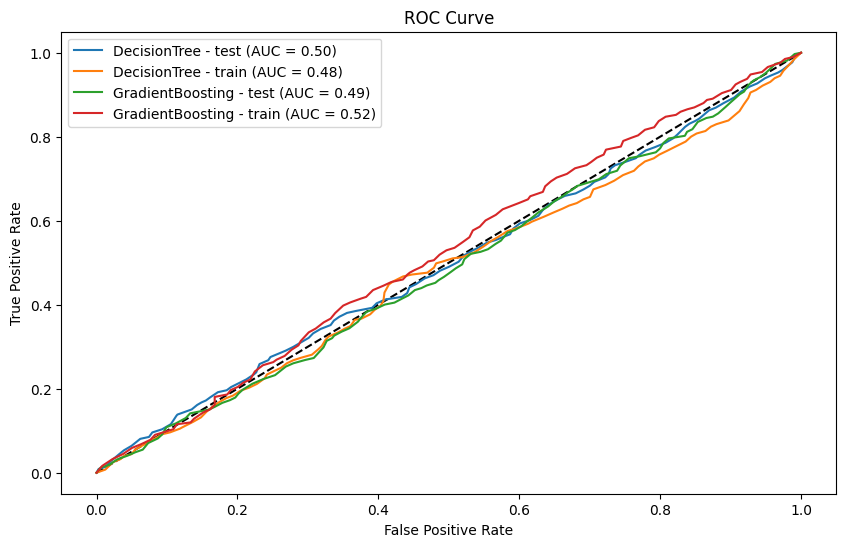

In [27]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--')

unique_models = df_class['model'].unique()
unique_parts = df_class['part'].unique()

for model in unique_models:
    for part in unique_parts:
        subset = df_class[(df_class['model'] == model) & (df_class['part'] == part)]
        fpr, tpr, _ = roc_curve(subset['Y_true'], subset['Y_pred_proba_1'])
        roc_auc = auc(fpr, tpr)
        
        label = f'{model} - {part} (AUC = {roc_auc:.2f})'
        plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()
#Здесь построил 4 рок кривые, добавил линию под 45 градусов(пунктирная)

In [ ]:
#Сравнивая модели, можно сказать, что градиентный бустинг на train значениях самый лучший